#4. 합성곱 신경망(CNN)

## 1. 합성곱 신경망
데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에 많이 사용됨. 이미지 분류, 객체 탐지, 스타일 전이

- 이미지 표현: 이미지를 컴퓨터가 이해할 수 있게 숫자로 표현. 이미지의 강도를 나타냄. 컬러 이미지는 RGB 3장의 이미지를 겹쳐 표현

- 합성곱(Convolution)
입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널을 사용해 입력 이미지에 대한 특성 추출. 추출된 이미지를 feature map이라 부름. 커널 사이즈가 3x3인 경우 9개의 가중치를 가지며 백프로파게이션하면 가중치 업데이트. 연산량이 완전 연결층 사용할 때보다 훨씬 적음

- 채널(channel): 입력 이미지를 구성하는 2차원 배열 개수. 흑백 이미지는 단일 채널. 컬러 이미지는 3개 채널. 입력 이미지가 여러 채널일 경우 합성곱 연산 수행할 때 특성맵 생성 과정을 잘 살펴야 함. 입력 이미지 채널 개수만큼 커널 생성, 각 채널마다 커널 하나씩 적용해 합성곱 연산 수행. 채널 개수만큼 연산 결과가 생성되고 각 결과를 더해 최종 특성맵 생성

- 스트라이드(stride): 커널이 좌측 상단부터 우측으로 이동하며 합성곱 연산을 할 때 이동 간격.
- 패딩(padding): 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정. 일반적으로 제로 패딩 사용
- 특성맵 사이즈
- 풀링(pooling): 추출된 특성맵에 대해 다운 샘플링해 이미지 크기 축소. 연산량 감소, 과대적합 방지. 최대풀링과 평균 풀링 방식이 있음.

## 간단한 모델 생성
mnist 손글씨 데이터셋으로 간단한 합성곱 신경망 모델 생성

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


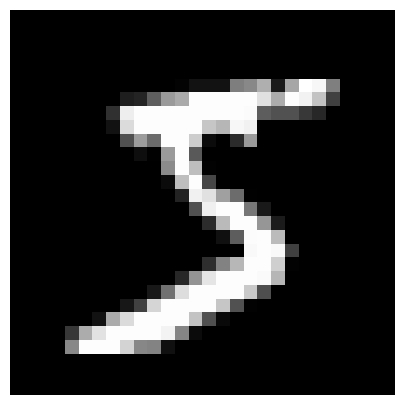

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train,0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


- Sequential API 로 모델 생성 및 학습: 합성공 레이어 1개 풀링 레이어 1개 적용하는 간단 모델. 최종 분류기 Dense 레이어 적용 위해 Flatten 층 추가해 1차원 배열로 펼치기. 합성곱은 conv2D 레이어 사용 커널 크기 3x3, ReLU 활성화 함수 적용

In [7]:
# Sequential API 를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.0871 - val_accuracy: 0.9757
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0797 - accuracy: 0.9773 - val_loss: 0.0640 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0603 - accuracy: 0.9821 - val_loss: 0.0587 - val_accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0500 - accuracy: 0.9854 - val_loss: 0.0567 - val_accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0412 - accuracy: 0.9882 - val_loss: 0.0558 - val_accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0358 - accuracy: 0.9892 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0545 -

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.0593 - accuracy: 0.9814


[0.059324268251657486, 0.9814000129699707]

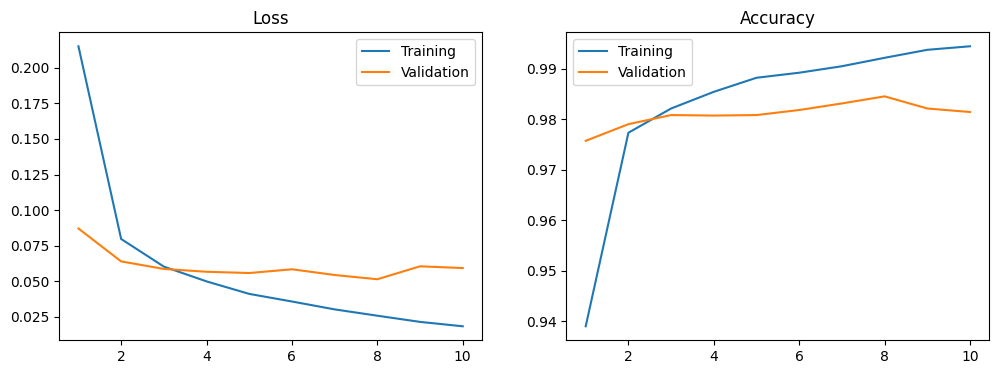

In [10]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12,4))
  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

- 모델 구조 파악: summary() 메소드 적용하면 모델 구조 요약해 보여줌. 각 레이어 이름 출력 텐서 형태 파라미터 개수 알 수 있음.

In [11]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 입력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [13]:
# 레이어
model.layers

In [14]:
# 첫번째 레이어 선택
model.layers[0]

In [15]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [16]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.48414224e-01, -5.70003569e-01, -6.43181145e-01,
            7.11606368e-02,  1.14497468e-01,  3.46143007e-01,
           -6.64572001e-01,  3.73136073e-01,  4.01172310e-01,
           -1.50004193e-01,  1.68022379e-01, -1.16957366e+00,
            1.21060774e-01, -4.22762990e-01,  4.90472525e-01,
            3.37261707e-01, -1.50897041e-01, -5.12626827e-01,
            2.20748618e-01, -2.78815091e-01,  4.78728153e-02,
           -1.08349049e+00,  4.99144614e-01, -2.68893570e-01,
           -6.02934808e-02,  2.95301199e-01, -3.31313938e-01,
            3.81490231e-01,  9.73334983e-02,  3.80038470e-01,
            1.47088930e-01, -1.52544051e-01]],
 
         [[-3.12715411e-01, -1.82036668e-01, -1.97277054e-01,
            2.85738558e-01,  3.54414642e-01, -1.00687556e-01,
           -9.50049330e-03,  1.44077167e-01,  1.50741087e-02,
           -7.70241082e-01, -1.51372573e-04, -2.41838664e-01,
           

In [19]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.48414224e-01, -5.70003569e-01, -6.43181145e-01,
           7.11606368e-02,  1.14497468e-01,  3.46143007e-01,
          -6.64572001e-01,  3.73136073e-01,  4.01172310e-01,
          -1.50004193e-01,  1.68022379e-01, -1.16957366e+00,
           1.21060774e-01, -4.22762990e-01,  4.90472525e-01,
           3.37261707e-01, -1.50897041e-01, -5.12626827e-01,
           2.20748618e-01, -2.78815091e-01,  4.78728153e-02,
          -1.08349049e+00,  4.99144614e-01, -2.68893570e-01,
          -6.02934808e-02,  2.95301199e-01, -3.31313938e-01,
           3.81490231e-01,  9.73334983e-02,  3.80038470e-01,
           1.47088930e-01, -1.52544051e-01]],

        [[-3.12715411e-01, -1.82036668e-01, -1.97277054e-01,
           2.85738558e-01,  3.54414642e-01, -1.00687556e-01,
          -9.50049330e-03,  1.44077167e-01,  1.50741087e-02,
          -7.70241082e-01, -1.51372573e-04, -2.41838664e-01,
           2.52564192e-01, -

In [20]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.1178708 , -0.10444209, -0.36092186, -0.18794636, -0.05588329,
       -0.36371544, -0.12305173, -0.19828673, -0.15653203, -0.01683247,
       -0.31280553, -0.03441374, -0.29035327, -0.09919511, -0.08241625,
       -0.00208346,  0.05364668, -0.21117118, -0.18743223, -0.01096568,
       -0.04772739, -0.02161987,  0.19745746, -0.15709417, -0.27261895,
       -0.21042451, -0.04273264, -0.29231158, -0.00508538, -0.38404658,
       -0.2056158 , -0.06303394], dtype=float32)>

In [21]:
# 레이어 이름 사용해 레이어 선택
model.get_layer('conv')

In [22]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])

len(activations)

1/1 [==============================] - 0s 97ms/step


2

In [23]:
# 첫번째 레이어 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

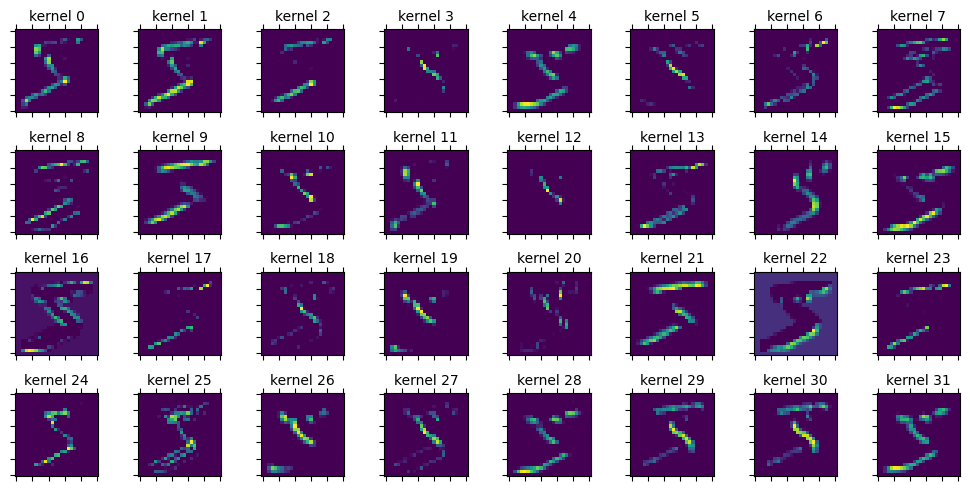

In [24]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i),fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [25]:
# 두번째 레이어 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


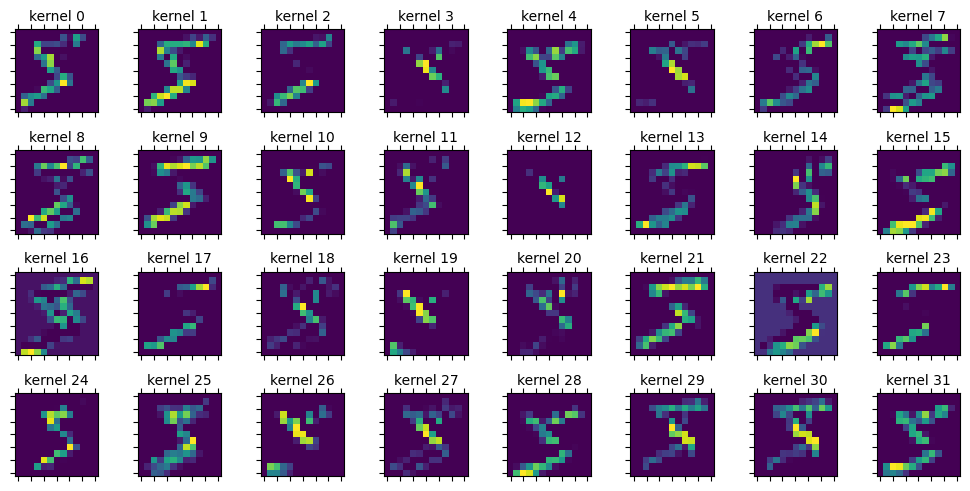

In [26]:
# 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i),fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 3. 복잡한 모델 생성.
레이어 기준 입력이나 출력이 2개 이상인 모델 생성

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 새로운 출력 값 배열 생성(홀수 1, 짝수 0)
y_train_odd = []
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [4]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [5]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [6]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train,-1)
x_valid_in = tf.expand_dims(x_valid,-1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10,activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 26, 26, 32)           320       ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)           0         ['conv2d_1[0][0]']            
 g2D)                                                                                             
                                                                                                  
 flatten_2 (Flatten)         (None, 5408)                 0         ['max_pooling2d_1[0][0]'] 

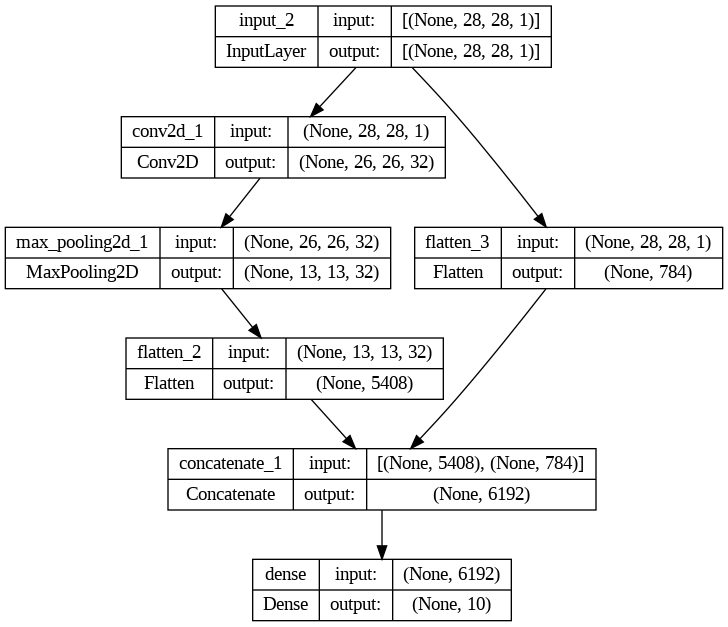

In [11]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [12]:
# 모델 컴파일
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1997 - accuracy: 0.9431 - val_loss: 0.0824 - val_accuracy: 0.9761
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0758 - accuracy: 0.9776 - val_loss: 0.0674 - val_accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 0.0581 - val_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0560 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0574 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0528 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0606 -

- 다중 출력 분류 모델: 0~9까지 숫자를 맞추는 분류 문제, 홀짝 맞추는 분류 문제 동시에 풀어내는 모델 정의. 최종 분류기의 출력 레이어 2개 만듦.

In [13]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [14]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


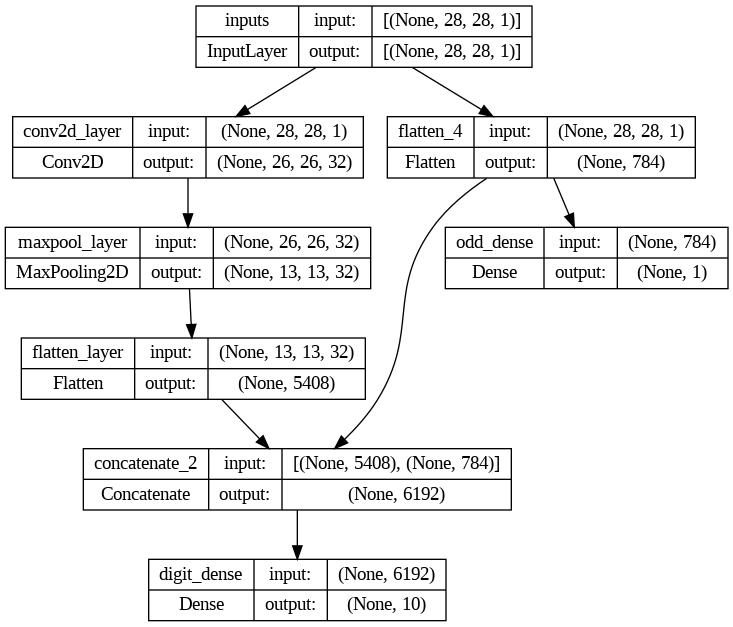

In [15]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [16]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy','odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1*sparse_categorical_crossentropy +0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3758 - digit_dense_loss: 0.2141 - odd_dense_loss: 0.3234 - digit_dense_accuracy: 0.9394 - odd_dense_accuracy: 0.8645 - val_loss: 0.2299 - val_digit_dense_loss: 0.0923 - val_odd_dense_loss: 0.2752 - val_digit_dense_accuracy: 0.9737 - val_odd_dense_accuracy: 0.8880
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2182 - digit_dense_loss: 0.0824 - odd_dense_loss: 0.2717 - digit_dense_accuracy: 0.9766 - odd_dense_accuracy: 0.8908 - val_loss: 0.2035 - val_digit_dense_loss: 0.0707 - val_odd_dense_loss: 0.2656 - val_digit_dense_accuracy: 0.9775 - val_odd_dense_accuracy: 0.8952
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1931 - digit_dense_loss: 0.0617 - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.9820 - odd_dense_accuracy: 0.8957 - val_loss: 0.1896 - val_digit_dense_loss: 0.0608 - val_odd_dense_loss: 0.2575 - val_digit_dense_accuracy: 0.9806 -

In [17]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense': y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 7ms/step - loss: 0.1866 - digit_dense_loss: 0.0591 - odd_dense_loss: 0.2551 - digit_dense_accuracy: 0.9836 - odd_dense_accuracy: 0.9003


[0.18662583827972412,
 0.05908199027180672,
 0.2550879120826721,
 0.9836000204086304,
 0.9003000259399414]

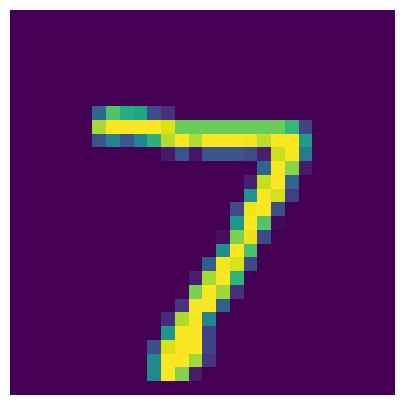

In [18]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid,0)

In [19]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 7ms/step
[9.5507395e-12 3.3034595e-10 2.6898896e-08 1.4178726e-06 4.5613045e-12
 1.6255311e-11 3.6771539e-20 9.9999851e-01 1.0444288e-09 2.5786543e-08]
[0.99960196]


In [20]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [23]:
odd_labels = (odd_preds > 0.5).astype(np.int64).reshape(1,-1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

- 전이 학습(Transfer Learning): 최종 출력층만 새롭게 추가해 모델 재구성. 기존 학습된 모델을 활용해 새로운 모델 만들어내는 개념

In [26]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


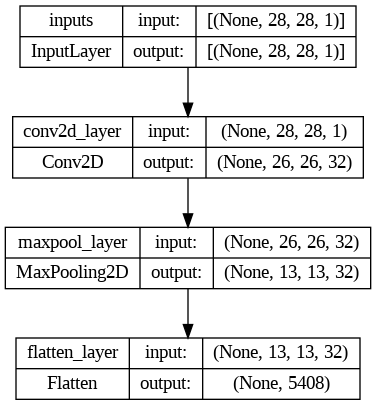

In [27]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [28]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation='softmax'),
])
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


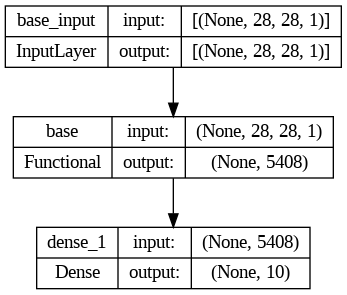

In [29]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [30]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1293 - accuracy: 0.9642 - val_loss: 0.0708 - val_accuracy: 0.9779
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0579 - accuracy: 0.9824 - val_loss: 0.0577 - val_accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0549 - val_accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0529 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0605 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0541 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0586 -

In [32]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name = 'base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [33]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [34]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1142 - accuracy: 0.9688 - val_loss: 0.0563 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0492 - accuracy: 0.9858 - val_loss: 0.0525 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0355 - accuracy: 0.9895 - val_loss: 0.0536 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0536 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0512 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0546 - val_accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.0531 - val

In [35]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [36]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [37]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1166 - accuracy: 0.9678 - val_loss: 0.0570 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0527 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0495 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0497 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0487 - val_accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 0.0534 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.0584 - val_ac